In [1]:
import numpy as np
from matplotlib import pyplot as plt
from bisect import bisect
from scipy.integrate import quad as integrate  

In [2]:
# Backbone: General Linear Congruence Generator
def GLCG(x0):
    a,b,m = 625,6571,31104
    while True:
        x0 = (a*x0+b)%m
        yield x0/m

glcg = GLCG(69)

def U(a,b):
    return a+(b-a)*next(glcg)


# Task 1

### Let's define the probability density f(x) and cumulative distribution F(x) functions as given
### Clearly, inverse of $F(x) = 1-(1-x)^3$ is $$F^{-1}(x) = 1-(1-x)^{1/3}$$ 

In [3]:
f = lambda x: 3*(1-x)**2
F = lambda x: 1-(1-x)**3
F_INV = lambda x: 1-(1-x)**(1/3)

### True mean is $EX$, given by $$ \mu = \int_{-\infty}^{\infty}xf(x)dx $$
### True variance is $EX^2-(EX)^2$, given by $$ VX = \int_{-\infty}^{\infty}x^2f(x)dx - \mu^2$$

In [4]:
true_mean = integrate(lambda x: x*f(x), 0,1)[0]
true_var  = integrate(lambda x: x*x*f(x), 0,1)[0] - true_mean**2
true_var = round(true_var,3)

print(f"True Mean {true_mean}")
print(f"True Variance {true_var}")

True Mean 0.25
True Variance 0.037


### In inverse transform sampling, we will generate from $U(0,1)$, and apply $F^{-1}$ before storing

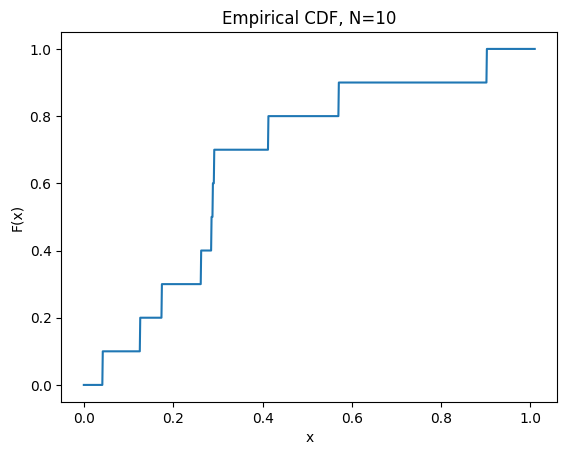

Mean is 0.3349, should be 0.25
Error = 33.9787%
Variance is 0.0552, should be 0.037
Error = 49.1896%


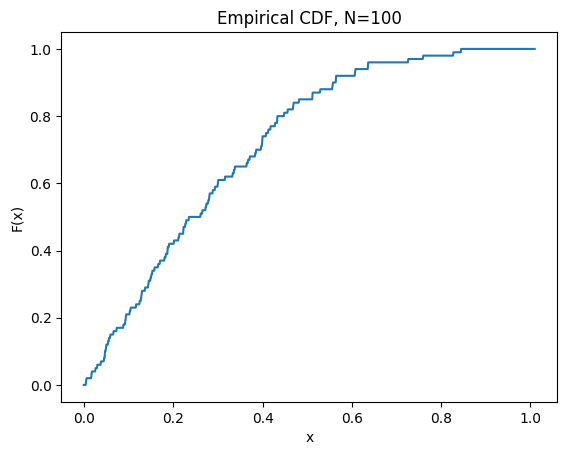

Mean is 0.2808, should be 0.25
Error = 12.3025%
Variance is 0.0394, should be 0.037
Error = 6.5521%


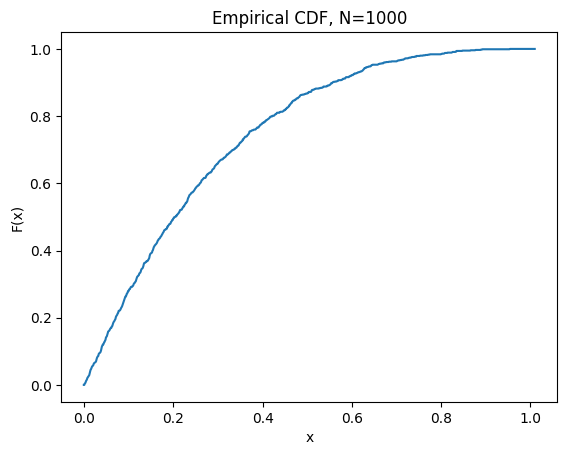

Mean is 0.2527, should be 0.25
Error = 1.0661%
Variance is 0.0404, should be 0.037
Error = 9.2017%


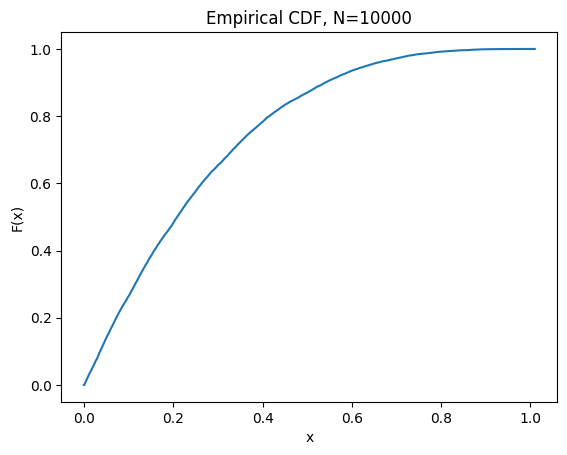

Mean is 0.2515, should be 0.25
Error = 0.5974%
Variance is 0.0378, should be 0.037
Error = 2.0975%


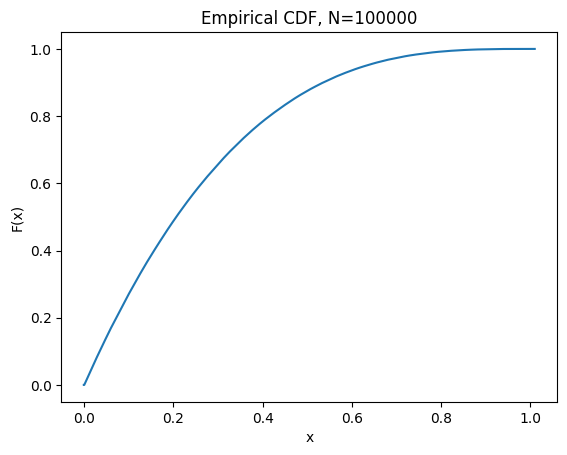

Mean is 0.2499, should be 0.25
Error = 0.0444%
Variance is 0.0374, should be 0.037
Error = 1.1907%


In [5]:
for N in (10,100,1000,10_000,100_000):
    plt.title(f"Empirical CDF, N={N}")
    plt.xlabel("x")
    plt.ylabel("F(x)")
    Xs = []
    for _ in range(N):
        X = F_INV( U(0,1) )
        Xs.append(X)
    Xs.sort()

    # Bisect module does binary search to find the range where generated number falls
    x = np.linspace(-0.001,1.01,1000)
    y = np.array([*map(lambda i: bisect(Xs,i), x)])/N
    plt.plot(x,y)
    plt.show()
    
    Xs = np.array(Xs)
    print(f"Mean is {Xs.mean():.4f}, should be {true_mean}")
    print(f"Error = {100*abs(Xs.mean()-true_mean)/true_mean:.4f}%")
    print(f"Variance is {Xs.var():.4f}, should be {true_var}")
    print(f"Error = {100*abs(Xs.var()-true_var)/true_var:.4f}%")


## Task 2

### Same as earlier, define f(x) and F(x).
### As for $F^{-1}$, it is piecewise as well, and we see that the switching point is $F(1)$ i.e $1-1/e$ 

### The inverse thus becomes
### $F^{-1} = x\mapsto-\ln(1-x)$ if $x\leq F(1)$ else $\frac{1}{2}(1-\ln(1-x))$

In [6]:
switch = 1-np.exp(-1)
f = lambda x: (0<x<=1) * (np.exp(-x)) + (1<x) * (2*np.exp(1-2*x))
F = lambda x: (0<x<=1) * (1-np.exp(-x)) + (1<x) * (1-np.exp(1-2*x))
F_INV = lambda x: (0<x<=switch) * (-np.log(1-x)) + (switch<x) * (1-np.log(1-x))/2


### Earlier we took the expectation and variance integrals from 0 to 1, now we need to take them from 0 to infinity

In [7]:
inf = float("inf")
true_mean = integrate(lambda x: x*f(x),   0,inf)[0]
true_var  = integrate(lambda x: x*x*f(x), 0,inf)[0] - true_mean**2
true_var  = round(true_var,3)

print(f"True Mean {true_mean}")
print(f"True Variance {true_var}")

True Mean 0.816060279414278
True Variance 0.414


### Plot of true CDF

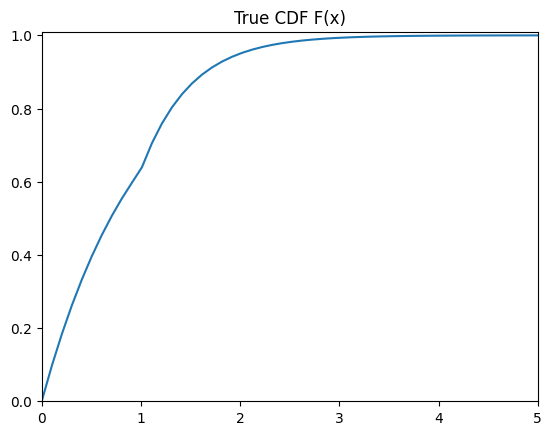

In [8]:
X = np.linspace(0,10,100)
Y = y = np.array([*map(lambda i: F(i), X)])
Y = [F(i) for i in X]
plt.title("True CDF F(x)")
plt.xlim(0,5); plt.ylim(0,1.01)
plt.plot(X, Y)
plt.show()

### Empirical Plots

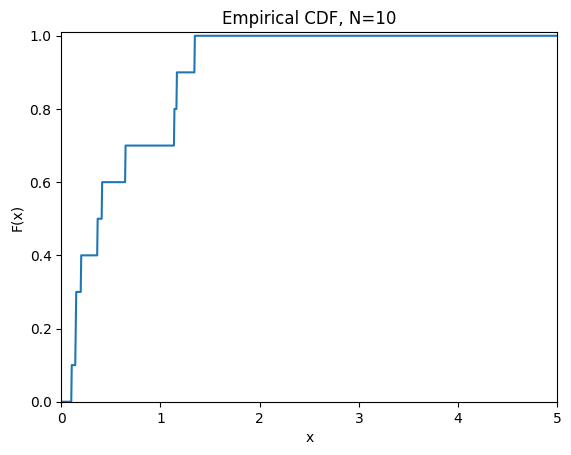

Mean is 0.5662, should be 0.816060279414278
Error = 30.6130%
Variance is 0.2069, should be 0.414
Error = 50.0154%


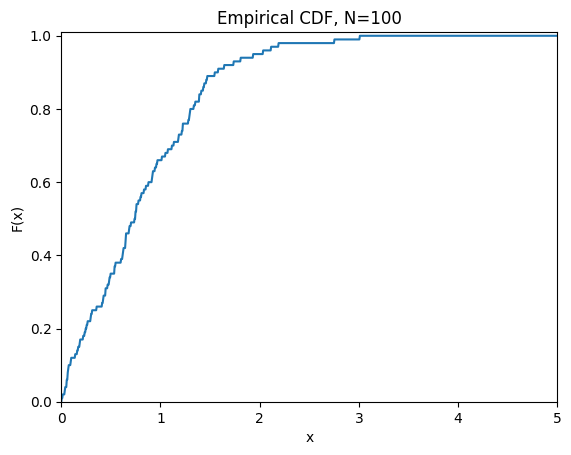

Mean is 0.8262, should be 0.816060279414278
Error = 1.2462%
Variance is 0.3723, should be 0.414
Error = 10.0609%


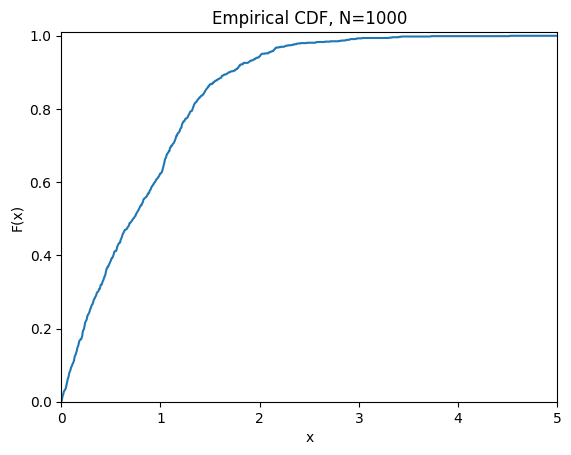

Mean is 0.8320, should be 0.816060279414278
Error = 1.9564%
Variance is 0.4269, should be 0.414
Error = 3.1121%


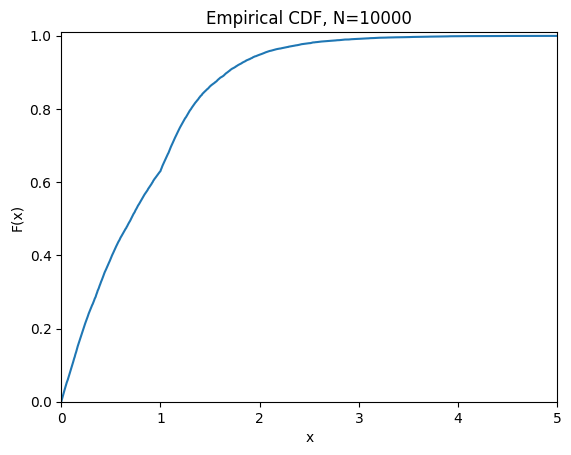

Mean is 0.8243, should be 0.816060279414278
Error = 1.0114%
Variance is 0.4289, should be 0.414
Error = 3.6086%


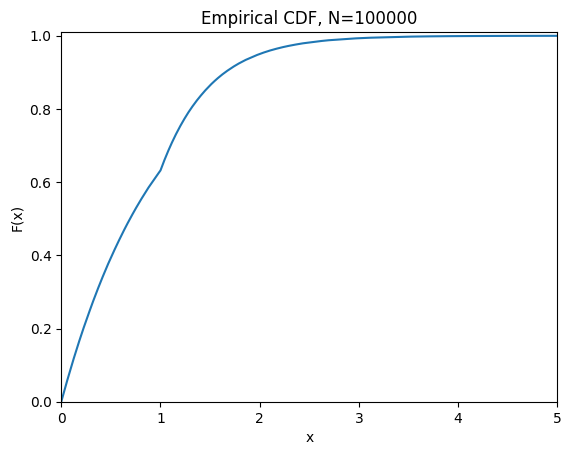

Mean is 0.8158, should be 0.816060279414278
Error = 0.0372%
Variance is 0.4130, should be 0.414
Error = 0.2310%


In [13]:
for N in (10,100,1000,10_000,100_000):
    plt.title(f"Empirical CDF, N={N}")
    plt.xlabel("x")
    plt.ylabel("F(x)")
    Xs = []
    for _ in range(N):
        X = F_INV( U(0,1) )
        Xs.append(X)
    Xs.sort()
    x = np.linspace(-0.01,5.01,1000)
    y = np.array([*map(lambda i: bisect(Xs,i), x)])/N
    plt.xlim(0,5); plt.ylim(0,1.01)
    plt.plot(x,y)
    plt.show()
    
    Xs = np.array(Xs)
    print(f"Mean is {Xs.mean():.4f}, should be {true_mean}")
    print(f"Error = {100*abs(Xs.mean()-true_mean)/true_mean:.4f}%")
    print(f"Variance is {Xs.var():.4f}, should be {true_var}")
    print(f"Error = {100*abs(Xs.var()-true_var)/true_var:.4f}%")

## Task 3

#### Using the rules $U(ka,kb)=kU(a,b)$ and $U(x+a,x+b)=x+U(a,b)$, it is quite simple to see that $$U\{1,3...9999\} = 2\cdot U\{0,1...4999\}+1$$  
#### And $U\{0,1...4999\}$ can be easily made from $\lfloor U(0,5000)\rfloor$, which in turn equals $\lfloor 5000\cdot U(0,1)\rfloor$
### Therefore, the required distribution is $$2\lfloor 5000\cdot U(0,1)\rfloor +1$$

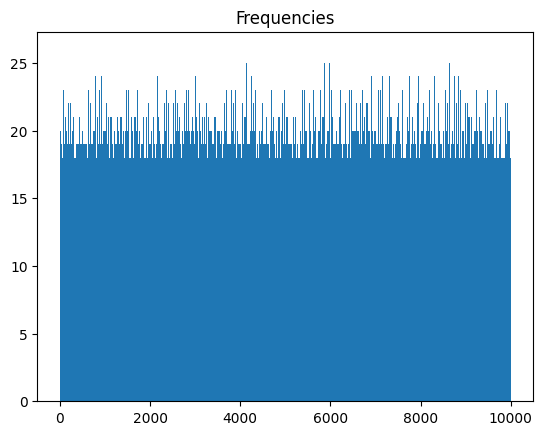

In [10]:
N = 10**5
X = []

for _ in range(N):
    x = 2*int(U(0,1)*5000)+1
    X.append(x)

plt.title("Frequencies")
plt.hist(X, bins=5000, align='mid')
plt.show()

In [11]:
X = np.array(X)
print(f"Min is {X.min()}, Max is {X.max()}")
print(f"Mean is {round(X.mean(),3)}, should be {5000}")

Min is 1, Max is 9999
Mean is 5000.953, should be 5000
